# K Nearest Neighbors

https://www.kaggle.com/rakeshrau/social-network-ads

## Import Libraries


In [1]:
import time
start = time.time()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Get the Data Set

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("Purchased_Dataset.csv")

x = df[['Age','EstimatedSalary']]
y = df['Purchased']

df.tail()
df.shape
df.size   #bytes

2000

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

#### Random State 

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=0)

# Predictions and Evaluations

Let's evaluate our KNN model!

In [44]:
import time
start = time.time() 

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)

end = time.time()
print(end - start)

0.0029993057250976562


In [45]:
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.83

In [46]:
x_train.head()

,Age,EstimatedSalary
250,44,39000
63,32,120000
312,38,50000
159,32,135000
283,52,21000


#### Random State 

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 10)
knnclassifier = KNeighborsClassifier(n_neighbors=5)


knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.87

In [48]:
x_train.head()


,Age,EstimatedSalary
57,28,79000
87,28,85000
357,41,72000
355,60,34000
238,46,82000


In [49]:
from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=5)


print(cross_val_score(knnclassifier, x, y, cv=10, scoring ='accuracy'))

[0.70731707 0.92682927 0.80487805 0.925      0.75       0.625
 0.725      0.82051282 0.71794872 0.76923077]


### Mean

In [50]:
print(cross_val_score(knnclassifier, x, y, cv=10, scoring ='accuracy').mean())

0.777171669793621


In [51]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[63  6]
 [ 7 24]]


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        69
           1       0.80      0.77      0.79        31

    accuracy                           0.87       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



### Finding Error on different k value

In [53]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(y_pred != y_test))

Text(0, 0.5, 'Error Rate')

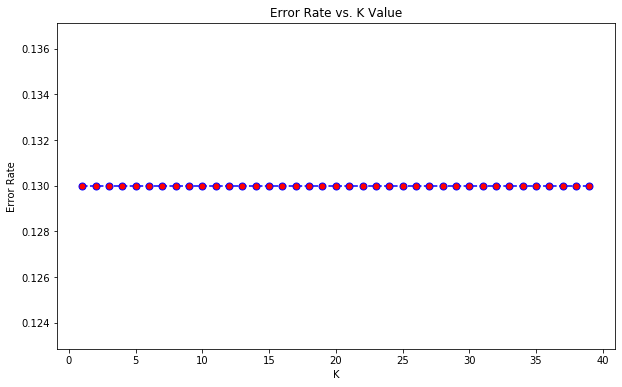

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=7)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [55]:
dataset = pd.get_dummies(df, columns = ['Age'])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['EstimatedSalary']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [57]:
dataset.head()

,User ID,Gender,EstimatedSalary,Purchased,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,...,Age_51,Age_52,Age_53,Age_54,Age_55,Age_56,Age_57,Age_58,Age_59,Age_60
0,15624510,Male,-1.490046,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15810944,Male,-1.460681,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15668575,Female,-0.785290,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15603246,Female,-0.374182,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15804002,Male,0.183751,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y = dataset['Purchased']
X = dataset.drop(['Purchased'], axis = 1)

### K Neighbors Classifier scores for different K values

In [59]:
from sklearn.model_selection import cross_val_score

knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

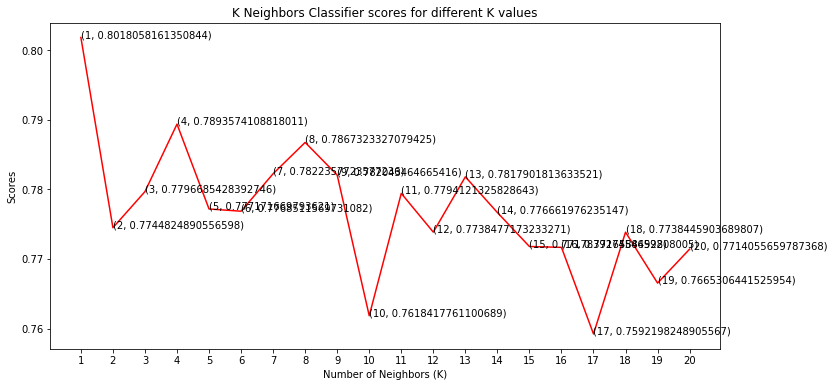

In [60]:
plt.figure(figsize=(12,6))

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
import matplotlib.pyplot as plt



### FIRST A QUICK COMPARISON TO OUR ORIGINAL K = 1

In [61]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K=1


[[63  6]
 [ 7 24]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.91        69
           1       0.80      0.77      0.79        31

    accuracy                           0.87       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



### FIRST A QUICK COMPARISON TO OUR ORIGINAL K other

In [62]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

WITH K


[[63  6]
 [ 7 24]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.91        69
           1       0.80      0.77      0.79        31

    accuracy                           0.87       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



### Importing the dataset

In [63]:
# Importing the dataset
dataset = pd.read_csv("Purchased_Dataset.csv")
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values



### Splitting the dataset into the Training set and Test set

In [64]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



### Feature Scaling

In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the K-NN model on the Training set

In [66]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [67]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)



In [68]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[64  4]
 [ 3 29]]


### Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


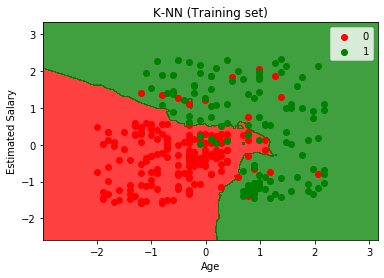

In [69]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



### END